## Question 1

$$H_{0}: mean = 7725$$

$$H_{1}: mean \not= 7725$$

In [1]:
import scipy
import scipy.stats as st

In [2]:
energy_intake = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

In [3]:
t_stats = st.ttest_1samp(energy_intake, 7725)[0]
p_value = st.ttest_1samp(energy_intake, 7725)[1]
mean = st.sem(energy_intake)
st_dev = scipy.std(energy_intake)
deg_of_freedom = len(energy_intake) - 1
SEM = st.sem(energy_intake)

In [4]:
print("Standard Error of the Mean: " + str(SEM) + "\nt-statistics: "
     + str(t_stats) + "\np_value " + str(p_value) + "\nStandard Deviation: " + str(st_dev)
     + "\nMean: " + str(mean) + "\nDegree of Freedom: " + str(deg_of_freedom))


Standard Error of the Mean: 344.3631083801271
t-statistics: -2.8207540608310198
p_value 0.018137235176105812
Standard Deviation: 1088.9717646166182
Mean: 344.3631083801271
Degree of Freedom: 10


## Question 2

First Step: Calculate the t-tsatistics 

$$t_{statistic} = \frac{x_1 - x_2}{\sqrt{\frac{s_{1}^2}{n_{1}}-\frac{s_{2}^2}{n_{2}}}}$$

In [5]:
import numpy as np
t_stats = (74-57)/np.sqrt((7.4**2/42)+(7.1**2/61))
t_stats

11.647653131319812

Second Step: Calculate the Degree of Freedom (DOF)
$$ DOF = n_{1} + n_{2} - 2 $$

In [6]:
DOF = 42 + 61 -2
DOF

101

Third Step: Look up the t-critical value for a two tailed test for p = 0.005 and DOF = 101

In [7]:
p_val =  scipy.stats.t.sf(np.abs(t_stats), DOF)/2
p_val

5.477585141322235e-21

## Question 3

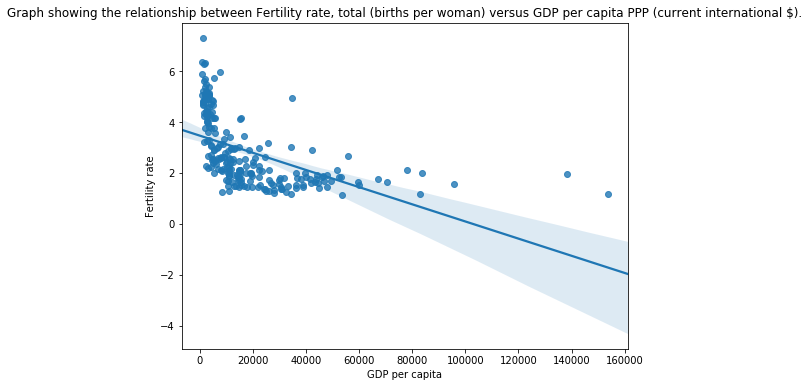

The correlation coefficient is -0.5238410792298206


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
gdp = pd.read_excel("GDP per capita.xls", sheet_name='Data', skiprows = 3)[['2013']]
fert =  pd.read_excel("fertility rate.xls", sheet_name='Data', skiprows = 3)[['2013']]
df = gdp.merge(fert, how='inner', right_index=True, left_index=True)
plt.figure(figsize =(8,6));
sns.regplot("2013_x", "2013_y", data = df);
plt.xlabel("GDP per capita");
plt.ylabel("Fertility rate");
plt.title("Graph showing the relationship between Fertility rate, total (births per woman) versus GDP per capita PPP (current international $).");
plt.show()

print("The correlation coefficient is " + str(df.corr()["2013_x"][1]))

## Question 4

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
monthly = pd.read_excel("monthly.xls", sheet_name = "Monthly")

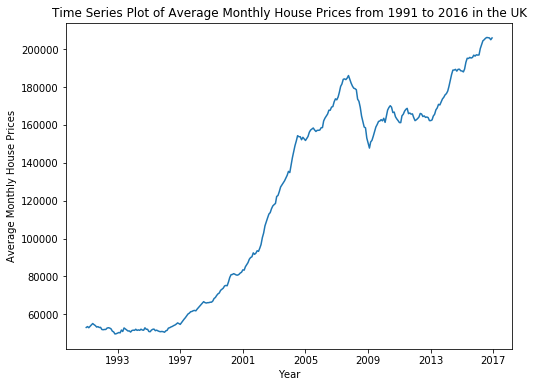

In [10]:
plt.figure(figsize =(8,6));
plt.plot(monthly[["Average House Price"]]);
plt.xlabel("Year");
plt.ylabel("Average Monthly House Prices");
plt.title("Time Series Plot of Average Monthly House Prices from 1991 to 2016 in the UK");

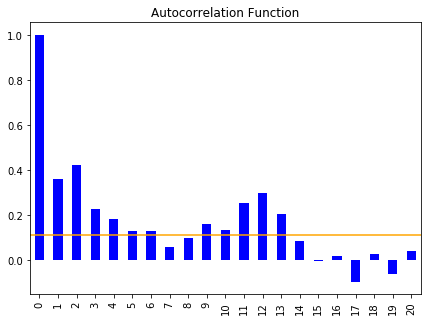

In [11]:
from statsmodels.tsa.stattools import acf
import numpy as np
monthly['returns'] = (monthly["Average House Price"]/monthly["Average House Price"].shift())-1
plt.figure(figsize =(7,5));
pd.Series(acf(monthly[["returns"]].dropna().values, nlags = 20)).plot.bar(color = "blue");
plt.axhline(1.96/np.sqrt(monthly.shape[0]), color = "orange");
plt.title("Autocorrelation Function");
plt.show()


In [12]:
ref = 1;
for i in monthly["returns"].dropna():
    ref*=(1+i)

Annualized = ((ref)**(1/(26*12))-1)*100
str(round(Annualized, 2))+'%'

'0.44%'

## Question 5

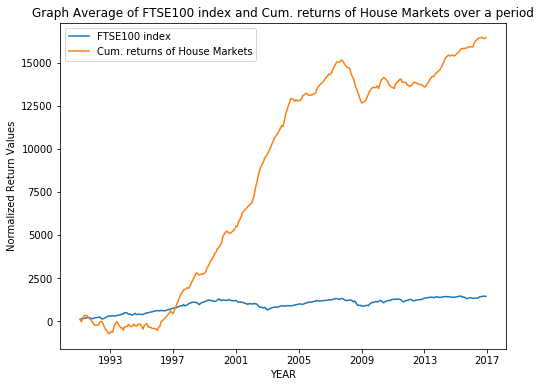

In [13]:
ftse = pd.read_csv("FTSE100.csv").set_index("Date")
monthly["monthly_cum_sum"] = monthly[["returns"]].cumsum().dropna()
df_2 = ftse[['Adj Close']].merge(monthly[['monthly_cum_sum']], how='inner', right_index=True, left_index=True)
df_2['ftse_return'] = (df_2["Adj Close"]/df_2["Adj Close"].shift())-1
df_2["ftse_cum_sum"] = df_2[["ftse_return"]].cumsum()
df_2 = df_2.dropna()
df_2['ftse_norm'] = (df_2['ftse_cum_sum']/df_2['ftse_cum_sum'][0])*100
df_2['monthly_norm'] = (df_2['monthly_cum_sum']/df_2['monthly_cum_sum'][0])*100

plt.figure(figsize =(8,6));
plt.plot(df_2['ftse_norm'], label = 'FTSE100 index');
plt.plot(df_2['monthly_norm'], label = 'Cum. returns of House Markets');
plt.title('Graph Average of FTSE100 index and Cum. returns of House Markets over a period');
plt.xlabel('YEAR');
plt.ylabel('Normalized Return Values');
plt.legend();


In [14]:
ref = 1
for i in df_2['ftse_return']:
    ref*=(1+i)
Annualized = (ref**(1/(26*12))-1)*100
str(round(Annualized, 2))+'%'

'0.36%'